## Packages ##

First, let's run the cell below to import all the packages that you will need. 
- [numpy](www.numpy.org) is the fundamental numerical library for scientific computing with Python.
- [matplotlib](http://matplotlib.org) is a fundamental library for plotting and visualizing data using Python.
- [scipy.integrate](https://docs.scipy.org/doc/scipy/reference/tutorial/integrate.html) is a sub-package that provides several integration techniques including an ordinary differential equation integrator.
- [scipy.integrate.odeint](https://docs.scipy.org/doc/scipy/reference/generated/scipy.integrate.odeint.html) integrates a system of ordinary differential equations.

In [1]:
import numpy as np
from matplotlib import pyplot as plt
from scipy.integrate import odeint
%matplotlib inline

## Runge-Kutta Integrators##
The Runge-Kutta methods ([Link to the Wikipedia page](https://en.wikipedia.org/wiki/Runge%E2%80%93Kutta_methods)) are a family of implicit and explicit iterative methods, which include the well-known routine called the Euler Method, used in temporal discretization for the approximate solutions of ordinary differential equations. The most widely known member of the Runge–Kutta family is generally referred to as "**RK4**", the "**Classic Runge–Kutta method**" or simply as "the Runge–Kutta method". 

Let an initial value problem be specified as follows:

$$\frac {dy}{dx}=f(x,y)$$
$$y(x_{0})=y_{0}$$
Here $y$ is an unknown function (scalar or vector) of $x$, which we would like to approximate; we are told that $\frac {dy}{dx}$, the rate at which $y$ changes, is a function of $x$ and of $y$ itself. At the initial $x_{0}$ the corresponding $y$ value is $y_{0}$. The function $f$ and the initial conditions $x_{0}$, $y_{0}$ are given.

Now pick a step-size $h > 0$ and define:

$$x_{n+1} = x_{n} + h$$
$$y_{n+1} = y_{n} + {\frac {h}{6}}\left(k_{1}+2k_{2}+2k_{3}+k_{4}\right)$$

for n = 0, 1, 2, 3, ... using:

$$ k_{1} = f(x_{n},y_{n}) $$
$$ k_{2} = f\left(x_{n}+{\frac {h}{2}},y_{n}+k_1{\frac {h}{2}}\right) $$
$$ k_{3} = f\left(x_{n}+{\frac {h}{2}},y_{n}+k_2{\frac {h}{2}}\right) $$
$$ k_{4} = f\left(x_{n}+h, y_{n}+k_{3}h\right)$$

In [2]:
# Runge Kutta Method of Order 4 (RK4) for the IVP: dy/dx = f(x, y) = (x-y)/2, x0 = 0, y0 = 1
def f1(x, y):
    return (x-y)/2
x0 = 0.0                               # Initial condition (Independent coordinate)
y0 = 1.0                               # Inititial Condition (Dependent coordinate)
h = 0.1                                # Step Size
xf = 10.0                              # Final point, till where you wish to iterate
xcoords = np.arange(x0, xf+h, h)
ycoords = np.zeros(len(xcoords))
ycoords[0] = y0
n = int((xf-x0)/h)

for i in range(0, n):
    k1 = f1(xcoords[i], ycoords[i])                        # f(x, y)
    k2 = f1(xcoords[i] + (h/2), ycoords[i] + k1*(h/2))     # f(x+(h/2), y+k1*(h/2))
    k3 = f1(xcoords[i] + (h/2), ycoords[i] + k2*(h/2))     # f(x+(h/2), y+k2*(h/2))
    k4 = f1(xcoords[i] + (h), ycoords[i] + k3*(h))         # f(x+h, y+k3*h)
    ycoords[i+1] = ycoords[i] + (h/6)*(k1 + 2*k2 + 2*k3 + k4)
    
# Exact solution is given by y(x) = 3*exp(-x/2) + (x-2)
ycoords_exact = np.asarray([3*np.exp(-x/2) + (x-2) for x in xcoords])

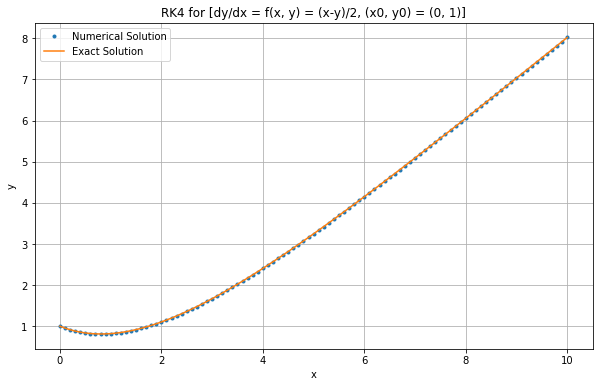

In [3]:
plt.figure(figsize=[10,6])
plt.plot(xcoords, ycoords, '.', label = "Numerical Solution")
plt.plot(xcoords, ycoords_exact, '-', label = "Exact Solution")
plt.title("RK4 for [dy/dx = f(x, y) = (x-y)/2, (x0, y0) = (0, 1)]")
plt.xlabel("x")
plt.ylabel("y")
plt.legend(loc="best")
plt.grid(True)
plt.show()

In [4]:
# Runge Kutta Method of Order 4 (RK4) for the IVP: dy/dx = f(x, y) = (x+y)*sin(xy), x0 = 0, y0 = 1
def f2(x, y):
    return (x+y)*np.sin(x*y)
x0 = 0.0                               # Initial condition (Independent coordinate)
y0 = 1.0                               # Inititial Condition (Dependent coordinate)
h = 0.1                                # Step Size
xf = 20.0                              # Final point, till where you wish to iterate
xcoords = np.arange(x0, xf+h, h)
ycoords = np.zeros(len(xcoords))
ycoords[0] = y0
n = int((xf-x0)/h)

for i in range(0, n):
    k1 = f2(xcoords[i], ycoords[i])                        # f(x, y)
    k2 = f2(xcoords[i] + (h/2), ycoords[i] + k1*(h/2))     # f(x+(h/2), y+k1*(h/2))
    k3 = f2(xcoords[i] + (h/2), ycoords[i] + k2*(h/2))     # f(x+(h/2), y+k2*(h/2))
    k4 = f2(xcoords[i] + (h), ycoords[i] + k3*(h))         # f(x+h, y+k3*h)
    ycoords[i+1] = ycoords[i] + (h/6)*(k1 + 2*k2 + 2*k3 + k4)

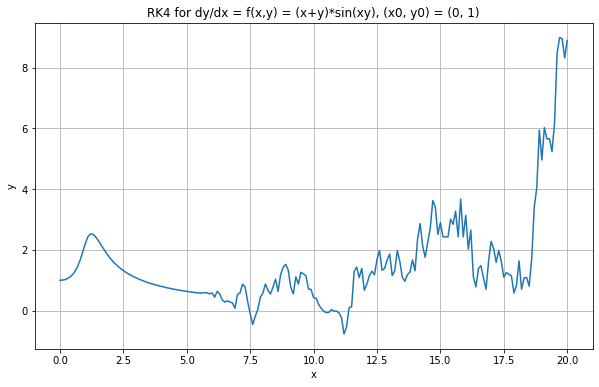

In [5]:
plt.figure(figsize=[10,6])
plt.plot(xcoords, ycoords, '-')
plt.title("RK4 for dy/dx = f(x,y) = (x+y)*sin(xy), (x0, y0) = (0, 1)")
plt.xlabel("x")
plt.ylabel("y")
plt.grid(True)
plt.show()

## Simple Pendulum ##
The equation that governs the **undamped motion of a simple pendulum** is as follows:

$$\frac{d^2 \theta}{dt^2} = -\frac{g}{l}\sin\theta$$

The odeint package is used for solving a system of first-order differential equations. Thus in order to solve the above second-order equation, we introduce an extra equation:

$$ \omega = \frac{d \theta}{dt} $$

This reduces the above to a system of two first order differential equations as follows:

$$ \frac{d \theta}{dt} = \omega $$ 
$$\frac{d \omega}{dt} = -\frac{g}{l}\sin\theta$$

The linear approximation of the above system gives the following equations:

$$ \frac{d \theta}{dt} = \omega $$ $$\frac{d \omega}{dt} = -\frac{g}{l}\theta$$

In [6]:
def pendulum(state, time):
    theta, omega = state
    return [omega, -(g/l)*np.sin(theta)]

# Parameters
g = 9.81
l = 1.0

time = np.arange(0, 10.0, 0.025)

# Initial conditions
initial_angle = 45.0
initial_angular_velocity = 0.0
theta0 = np.radians(initial_angle)
omega0 = np.radians(initial_angular_velocity)

# Find the solution to the nonlinear problem
nonlinear = odeint(pendulum, [theta0, omega0],  time)
nonlinear_theta = np.degrees(nonlinear[:,0])
nonlinear_omega = np.degrees(nonlinear[:,1])

# Find the solution to the linear problem
w = np.sqrt(g/l)
linear_theta = [theta0*np.cos(w*t) + (omega0/w)*np.sin(w*t) for t in time]
linear_omega = [-w*theta0*np.sin(w*t) + (omega0)*np.cos(w*t) for t in time]
linear_theta = np.degrees(np.asarray(linear_theta))
linear_omega = np.degrees(np.asarray(linear_omega))

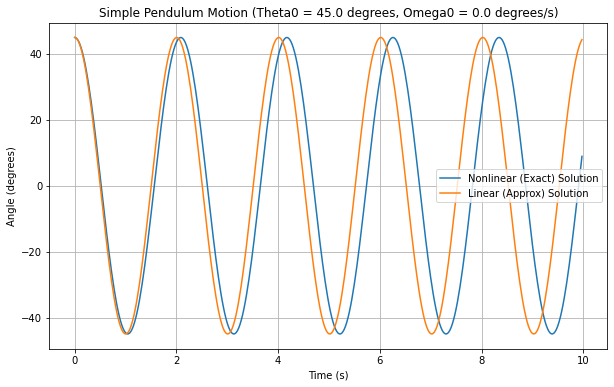

In [7]:
plt.figure(figsize=[10,6])
plt.plot(time, nonlinear_theta, label = "Nonlinear (Exact) Solution")
plt.plot(time, linear_theta, label = "Linear (Approx) Solution")

plt.title('Simple Pendulum Motion (Theta0 = ' + str(initial_angle) + ' degrees, Omega0 = ' \
          + str(initial_angular_velocity) + ' degrees/s)') 
# The backslash "\" characater allows you to write a single command split over multiple lines

plt.xlabel('Time (s)')
plt.ylabel('Angle (degrees)')
plt.grid(True)
plt.legend(loc='best')
plt.show()

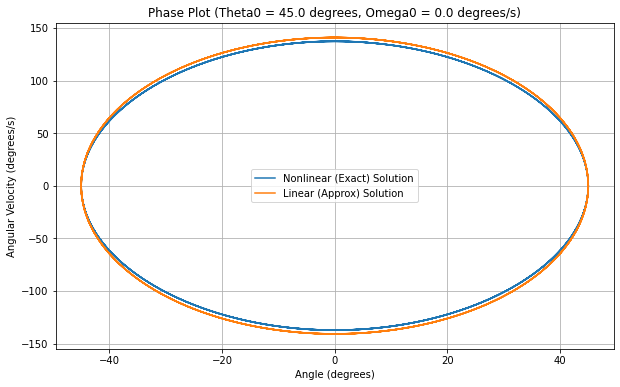

In [8]:
plt.figure(figsize=[10,6])
plt.plot(nonlinear_theta, nonlinear_omega, label = "Nonlinear (Exact) Solution")
plt.plot(linear_theta, linear_omega, label = "Linear (Approx) Solution")
plt.title('Phase Plot (Theta0 = ' + str(initial_angle) + ' degrees, Omega0 = ' + str(initial_angular_velocity) + ' degrees/s)')
plt.xlabel('Angle (degrees)')
plt.ylabel('Angular Velocity (degrees/s)')
plt.grid(True)
plt.legend(loc='best')
plt.show()

The equation that governs the **motion of a simple pendulum in case of damping** is:

$$ \frac{d^2 \theta}{dt^2} = -\frac{g}{l}\sin\theta - \gamma \frac{d \theta}{dt} \; , \; \; \; \gamma > 0 $$

After reducing this to a system of two first order differential equations by the same method as above, we get:

$$ \frac{d \theta}{dt} = \omega $$ 
$$ \frac{d \omega}{dt} = -\frac{g}{l}\sin\theta - \gamma \omega $$

In [9]:
def damped_pendulum(state, time):
    theta, omega = state
    return [omega, -(g/l)*np.sin(theta) - gamma*omega]

# Parameters
g = 9.81
l = 1.0
gamma = 1 

# For the linear approximation of the damped system (replacing sin(theta) by theta), we have:
# w = sqrt(g/l) (= sqrt(9.81) = 3.132 in this example)
# gamma > 2w : Overdamped
# gamma = 2w : Critically Damped
# gamma < 2w : Underdamped 

time = np.arange(0, 20.0, 0.025)

# Initial conditions
initial_angle = 45.0
initial_angular_velocity = 0.0
theta0 = np.radians(initial_angle)
omega0 = np.radians(initial_angular_velocity)

# Find the solution to the nonlinear problem
damped = odeint(damped_pendulum, [theta0, omega0],  time)
damped_theta = np.degrees(damped[:,0])
damped_omega = np.degrees(damped[:,1])

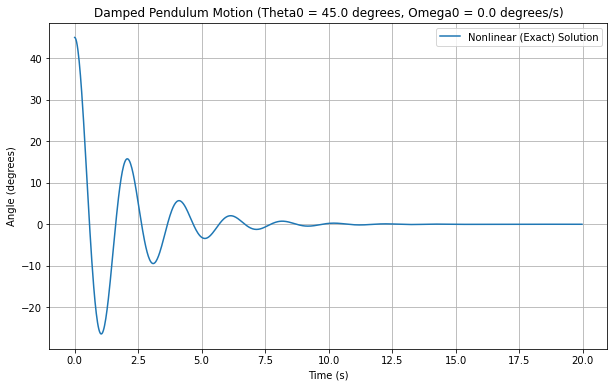

In [10]:
plt.figure(figsize=[10,6])
plt.plot(time, damped_theta, label = "Nonlinear (Exact) Solution")
plt.title('Damped Pendulum Motion (Theta0 = ' + str(initial_angle) + ' degrees, Omega0 = ' \
          + str(initial_angular_velocity) + ' degrees/s)')
plt.xlabel('Time (s)')
plt.ylabel('Angle (degrees)')
plt.grid(True)
plt.legend(loc='best')
plt.show()

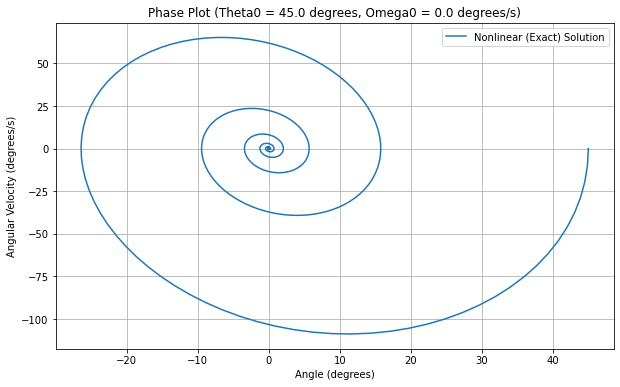

In [11]:
plt.figure(figsize=[10,6])
plt.plot(damped_theta, damped_omega, label = "Nonlinear (Exact) Solution")
plt.title('Phase Plot (Theta0 = ' + str(initial_angle) + ' degrees, Omega0 = ' + str(initial_angular_velocity) + ' degrees/s)')
plt.xlabel('Angle (degrees)')
plt.ylabel('Angular Velocity (degrees/s)')
plt.grid(True)
plt.legend(loc='best')
plt.show()

### Damped Motion ###

For those of you who are interested in delving deeper into the equation of motion for the damped case, and understand the math required to arrive at the three different solution cases, here are a few useful resources:
- ["Harmonic Oscillator" Wikipedia Page](https://en.wikipedia.org/wiki/Harmonic_oscillator#Damped_harmonic_oscillator) : Look at the Damped Harmonic Oscillator section for an overview of the damped simple harmonic motion equation.
- ["Damped Harmonic Oscillators" Youtube Video](https://www.youtube.com/watch?v=UtkwsWZnp5o) : This video is a great starting point to understanding how the damping equation is solved.
- [Brilliant.org Page on "Damped Harmonic Oscillators"](https://brilliant.org/wiki/damped-harmonic-oscillators/#:~:text=At%20low%20velocities%20in%20non,%E2%80%8B%3D%E2%88%92bx%CB%99.) : This page explains the details of the damping equation and the physical intuition behind the three different solution cases in a pretty nice way.
- [MIT OCW Notes on "Under, Over and Critical Damping"](https://ocw.mit.edu/courses/mathematics/18-03sc-differential-equations-fall-2011/unit-ii-second-order-constant-coefficient-linear-equations/damped-harmonic-oscillators/MIT18_03SCF11_s13_2text.pdf) : In this PDF, you will find the proper detailed mathematical treatment of all the three cases of damped simple harmonic motion.